<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/Interactive_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider


In [55]:
def step(z):
    return (z >= 0).astype(int)

def mlp_xor(x1, x2, W_hidden, b_hidden, W_output, b_output):
    inputs = np.array([x1, x2])

    # Hidden Layer
    hidden_input = np.dot(W_hidden, inputs) + b_hidden
    hidden_output = step(hidden_input)

    # Output Layer
    output_input = np.dot(W_output, hidden_output) + b_output
    output = step(output_input)

    return output


In [56]:
def plot_decision_boundary(W_hidden, b_hidden, W_output, b_output):
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = np.array([mlp_xor(x1, x2, W_hidden, b_hidden, W_output, b_output)
                  for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(4, 4))
    plt.contourf(xx, yy, Z, levels=[-0.1, 0.5, 1.1], colors=['lightgreen', 'lightyellow'], alpha=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Decision Boundary')
    plt.grid(True)


    x1s = np.random.rand(100) * 1.2 - 0.1
    x2s = np.random.rand(100) * 1.2 - 0.1
    outputs = np.array([mlp_xor(x1, x2, W_hidden, b_hidden, W_output, b_output)
                        for x1, x2 in zip(x1s, x2s)])
    plt.plot(x1s[outputs == 0], x2s[outputs == 0], "gs", markersize=5, label='Class 0')
    plt.plot(x1s[outputs == 1], x2s[outputs == 1], "y^", markersize=5, label='Class 1')
    plt.legend()
    plt.show()


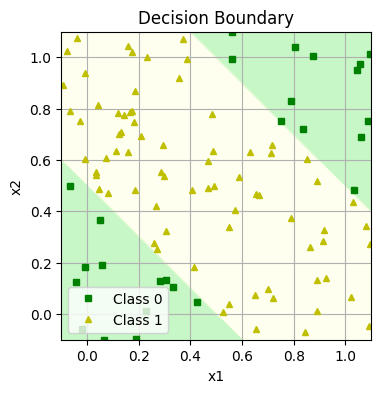

interactive(children=(FloatSlider(value=1.0, description='W_h11', max=5.0, min=-5.0), FloatSlider(value=1.0, d…

In [60]:

# Function for interactive plotting
def interactive_plot(w_hidden_11, w_hidden_12, w_hidden_21, w_hidden_22,
                     b_hidden_1, b_hidden_2,
                     w_output_1, w_output_2, b_output):
    W_hidden = np.array([[w_hidden_11, w_hidden_12],
                         [w_hidden_21, w_hidden_22]])
    b_hidden = np.array([b_hidden_1, b_hidden_2])
    W_output = np.array([w_output_1, w_output_2])

    plot_decision_boundary(W_hidden, b_hidden, W_output, b_output)

# Initial static plot
initial_W_hidden = np.array([[1, 1], [1, 1]])
initial_b_hidden = np.array([-0.5, -1.5])
initial_W_output = np.array([1, -2])
initial_b_output = -0.5

plot_decision_boundary(initial_W_hidden, initial_b_hidden, initial_W_output, initial_b_output)

# Interactive widget
interact(
    interactive_plot,
    w_hidden_11=FloatSlider(min=-5, max=5, step=0.1, value=1, description='W_h11'),
    w_hidden_12=FloatSlider(min=-5, max=5, step=0.1, value=1, description='W_h12'),
    w_hidden_21=FloatSlider(min=-5, max=5, step=0.1, value=1, description='W_h21'),
    w_hidden_22=FloatSlider(min=-5, max=5, step=0.1, value=1, description='W_h22'),
    b_hidden_1=FloatSlider(min=-5, max=5, step=0.1, value=-0.5, description='b_h1'),
    b_hidden_2=FloatSlider(min=-5, max=5, step=0.1, value=-1.5, description='b_h2'),
    w_output_1=FloatSlider(min=-5, max=5, step=0.1, value=1, description='W_o1'),
    w_output_2=FloatSlider(min=-5, max=5, step=0.1, value=-2, description='W_o2'),
    b_output=FloatSlider(min=-5, max=5, step=0.1, value=-0.5, description='b_o'),
);